In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn import datasets, linear_model, metrics
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


DATA PREPROCESSING

Data loading

In [2]:
file_path = r"C:\Users\mkiarie\Documents\DATA SCIENCE WANJA\train.csv"

bf = pd.read_csv(file_path)
bf.head()

id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0       25.0      0.50     0.25     0.75   0.50              69.7   
1   1       25.0      0.50     0.25     0.50   0.50              69.7   
2   2       12.5      0.25     0.25     0.63   0.63              86.0   
3   3       12.5      0.25     0.25     0.63   0.50              77.4   
4   4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  41.2         24.0                0.39  0.425011   0.417545   
1                  41.2         24.0                0.39  0.444908   0.422051   
2                  50.8         24.0                0.39  0.552927   0.470853   
3                  45.8         24.0                0.39  0.565976   0.478137   
4                  45.8         24.0                0.39  0.579677   0.494165   

       seeds       yield  
0  32.460887  4476.81146  
1  33.858317  5548.12201  
2  38.341781  6869.77760  
3  39.467561  6880.77590  
4  40.484512  7479.93417

exploratory data analysis

In [3]:
bf_cols = bf.columns

In [4]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [5]:
bf.describe()

id     clonesize      honeybee       bumbles       andrena  \
count  15289.000000  15289.000000  15289.000000  15289.000000  15289.000000   
mean    7644.000000     19.704690      0.389314      0.286768      0.492675   
std     4413.698468      6.595211      0.361643      0.059917      0.148115   
min        0.000000     10.000000      0.000000      0.000000      0.000000   
25%     3822.000000     12.500000      0.250000      0.250000      0.380000   
50%     7644.000000     25.000000      0.500000      0.250000      0.500000   
75%    11466.000000     25.000000      0.500000      0.380000      0.630000   
max    15288.000000     40.000000     18.430000      0.585000      0.750000   

              osmia  MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count  15289.000000      15289.000000      15289.000000          15289.000000   
mean       0.592355         82.169887         49.673281             68.656256   
std        0.139489          9.146703          5.546405              7.641807   
min        0.000000         69.700000         39.000000             58.200000   
25%        0.500000         77.400000         46.800000             64.700000   
50%        0.630000         86.000000         52.000000             71.900000   
75%        0.750000         86.000000         52.000000             71.900000   
max        0.750000         94.600000         57.200000             79.000000   

       MaxOfLowerTRange  MinOfLowerTRange  AverageOfLowerTRange   RainingDays  \
count      15289.000000      15289.000000          15289.000000  15289.000000   
mean          59.229538         28.660553             48.568500     18.660865   
std            6.610640          3.195367              5.390545     11.657582   
min           50.200000         24.300000             41.200000      1.000000   
25%           55.800000         27.000000             45.800000     16.000000   
50%           62.000000         30.000000             50.800000     16.000000   
75%           62.000000         30.000000             50.800000     24.000000   
max           68.200000         33.000000             55.900000     34.000000   

       AverageRainingDays      fruitset     fruitmass         seeds  \
count        15289.000000  15289.000000  15289.000000  15289.000000   
mean             0.324176      0.502741      0.446553     36.164950   
std              0.163905      0.074390      0.037035      4.031087   
min              0.060000      0.192732      0.311921     22.079199   
25%              0.260000      0.458246      0.419216     33.232449   
50%              0.260000      0.506600      0.446570     36.040675   
75%              0.390000      0.560445      0.474134     39.158238   
max              0.560000      0.652144      0.535660     46.585105   

              yield  
count  15289.000000  
mean    6025.193999  
std     1337.056850  
min     1945.530610  
25%     5128.163510  
50%     6117.475900  
75%     7019.694380  
max     8969.401840

In [6]:
bf.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [7]:
bf.head()

id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0       25.0      0.50     0.25     0.75   0.50              69.7   
1   1       25.0      0.50     0.25     0.50   0.50              69.7   
2   2       12.5      0.25     0.25     0.63   0.63              86.0   
3   3       12.5      0.25     0.25     0.63   0.50              77.4   
4   4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  41.2         24.0                0.39  0.425011   0.417545   
1                  41.2         24.0                0.39  0.444908   0.422051   
2                  50.8         24.0                0.39  0.552927   0.470853   
3                  45.8         24.0                0.39  0.565976   0.478137   
4                  45.8         24.0                0.39  0.579677   0.494165   

       seeds       yield  
0  32.460887  4476.81146  
1  33.858317  5548.12201  
2  38.341781  6869.77760  
3  39.467561  6880.77590  
4  40.484512  7479.93417

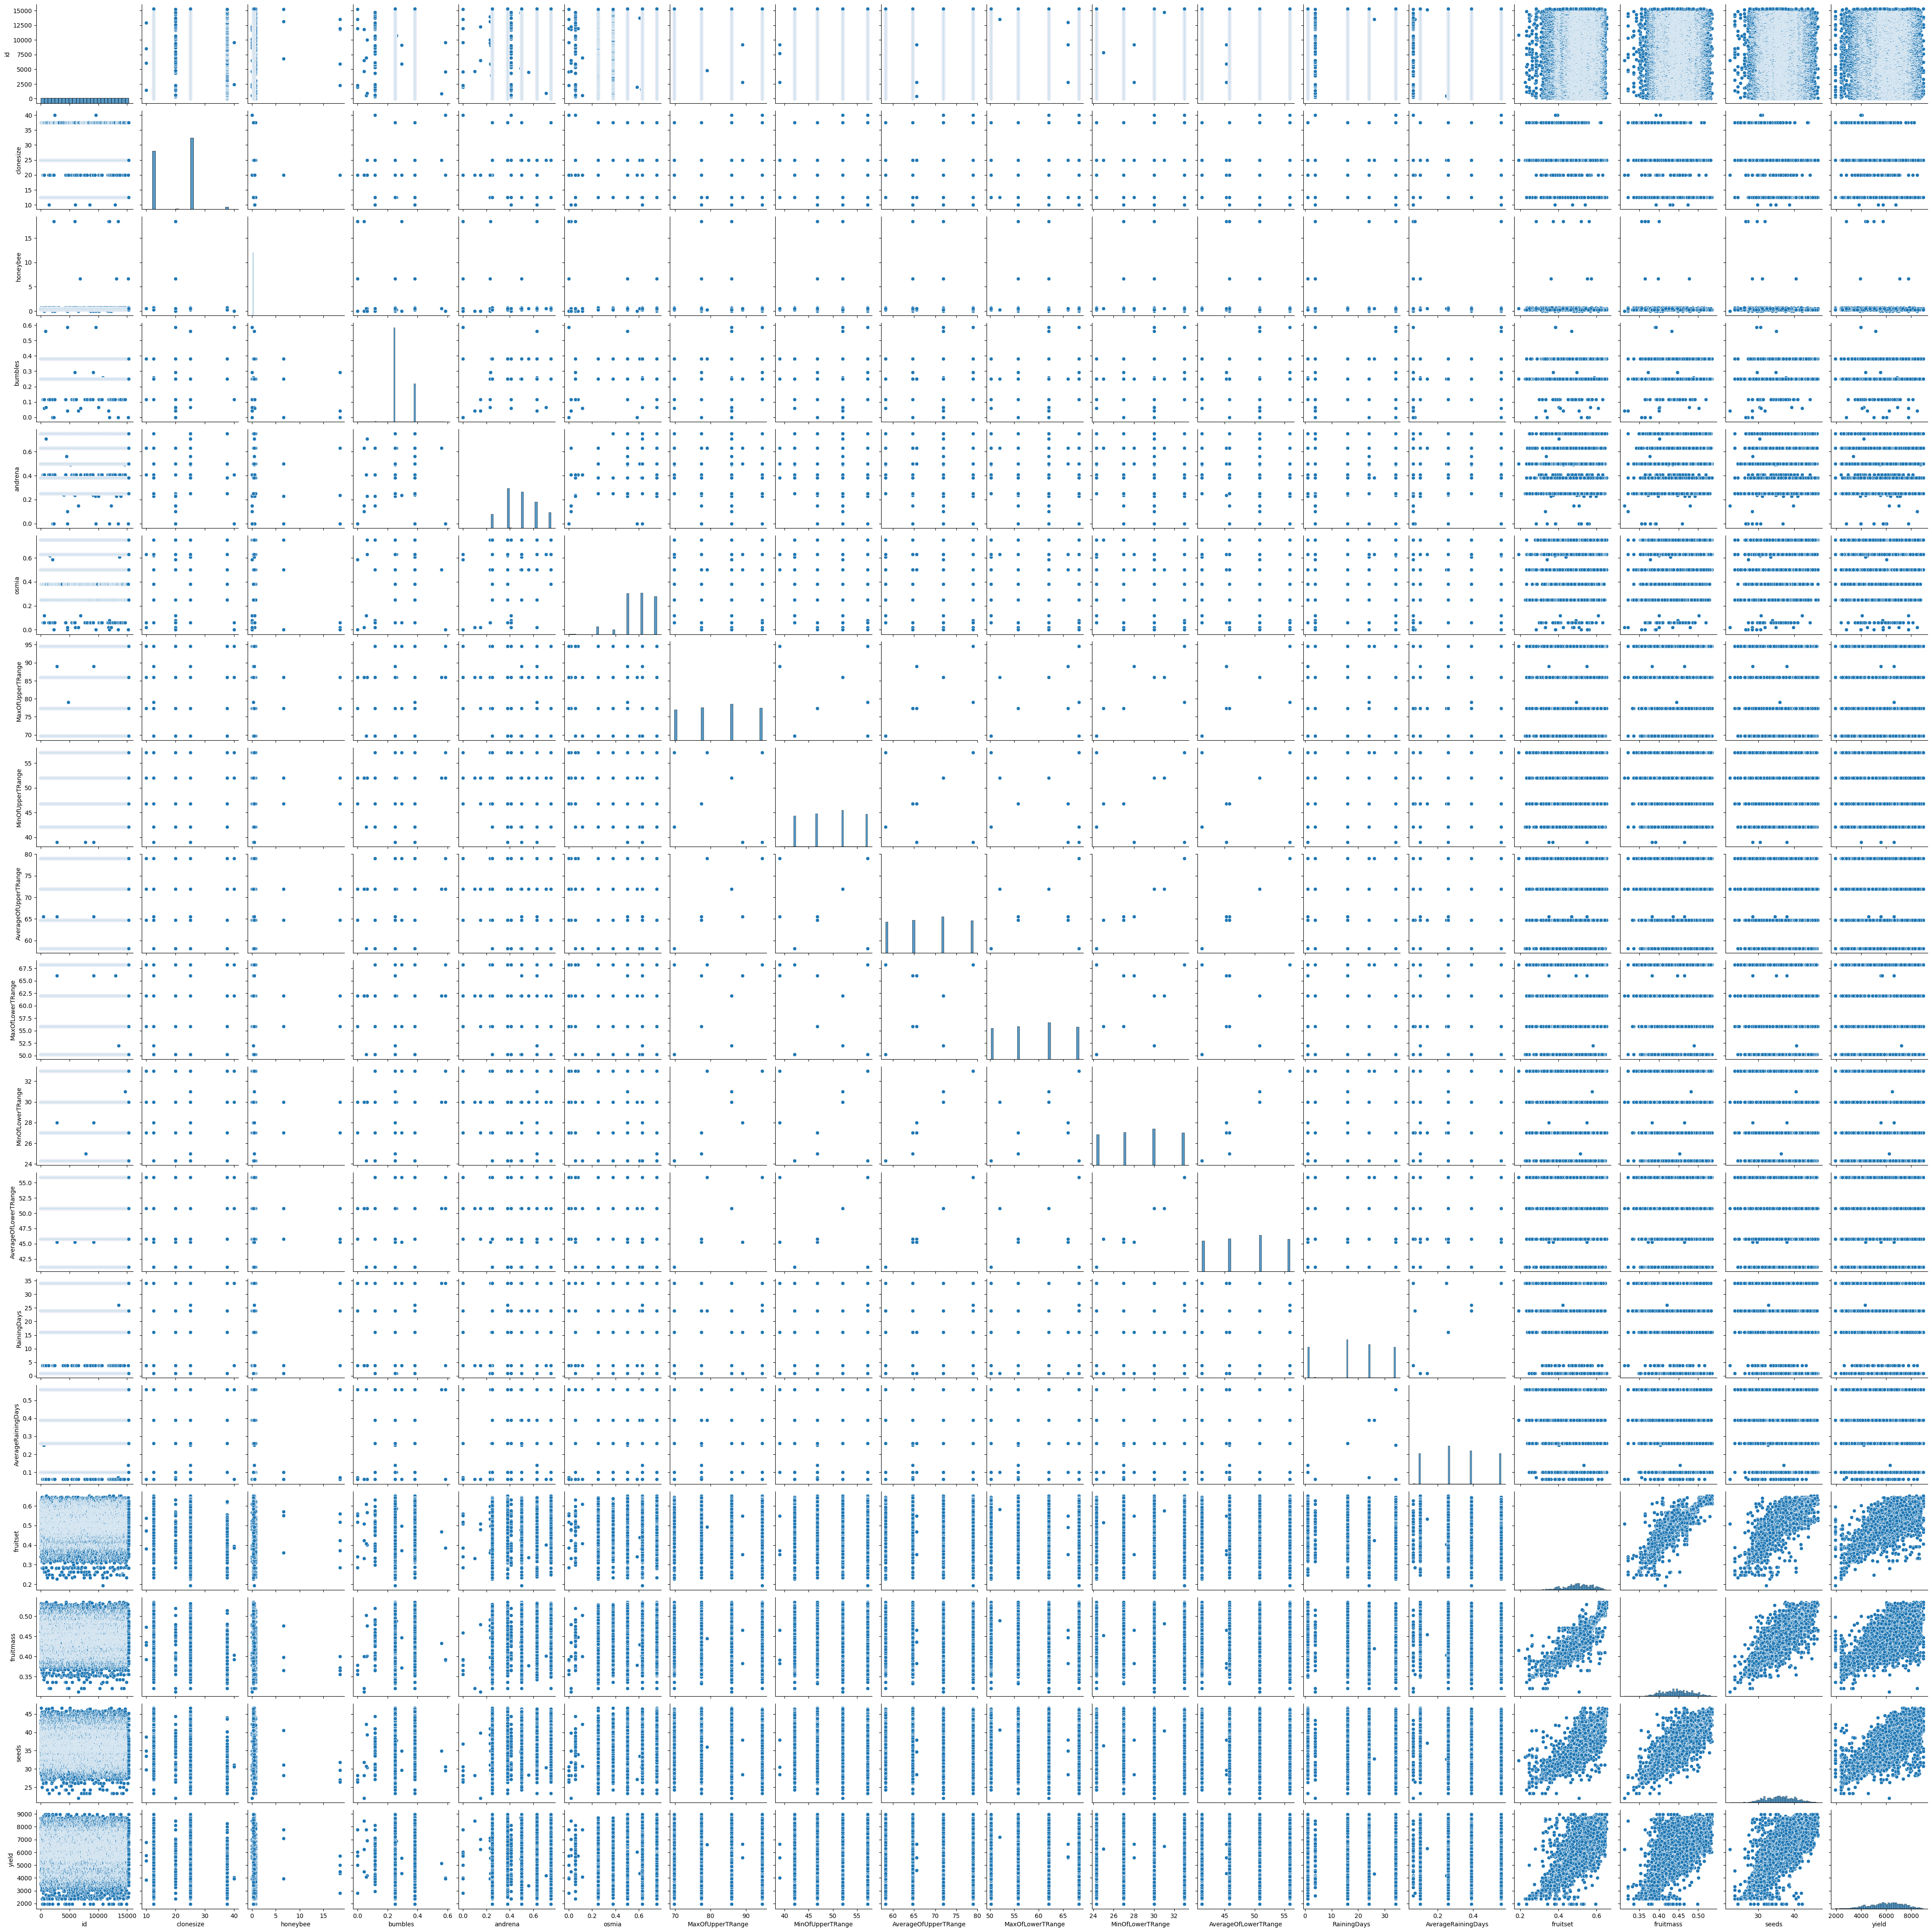

In [8]:
#print(bf.columns)
#columns_exclude = ['id']

#filtered_bf = bf.drop(columns_exclude)

sns.pairplot(bf)

plt.show()


OVERVIEW 
Your Goal: For this Episode of the Series, your task is to use regression to predict the yield of wild blueberries.

CHECKING DISTRIBUTION OF THE NUMERICAL COLUMS

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')


C:\Users\mkiarie\AppData\Local\Temp\ipykernel_20880\2592541425.py:18: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


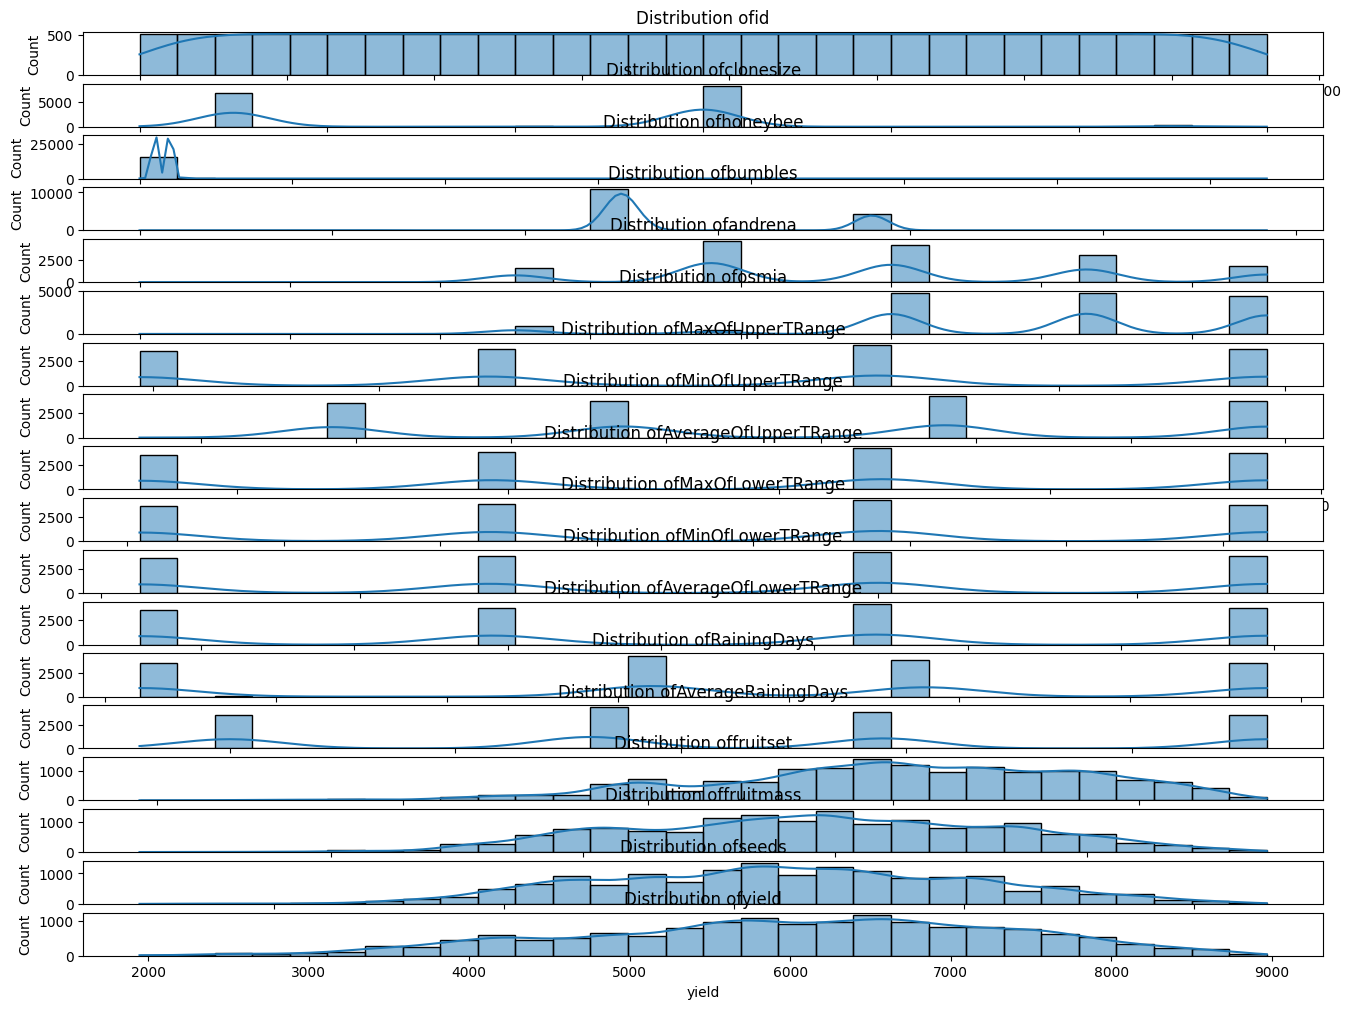

In [9]:
#checking on the distribution of the data

numeric_columns = (bf.select_dtypes(include=[np.number]).columns)

print(numeric_columns)

# Plot histograms for each numerical column

num_plots = len(numeric_columns)
plt.figure(figsize=(16, 12))

for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i +1)
    sns.histplot(bf[column], kde=True, bins=30)
    plt.title(f'Distribution of{column}')


plt.tight_layout()
plt.show()


checking the quality of the data

In [10]:
#Check for missing values
missing_values = bf.isnull().sum()
print(missing_values)



id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64


In [11]:
#checking for duplicate values

duplicate_values = bf.duplicated().sum()

print(duplicate_values)


0


In [12]:
#checking for data types in every column
print(bf.dtypes)


id                        int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object


In [13]:
#unique values per cloumn

for column in bf.columns:
    unique_values = bf[column].nunique()
    print(f"{column}: {unique_values} unique values")

id: 15289 unique values
clonesize: 6 unique values
honeybee: 7 unique values
bumbles: 11 unique values
andrena: 16 unique values
osmia: 14 unique values
MaxOfUpperTRange: 6 unique values
MinOfUpperTRange: 5 unique values
AverageOfUpperTRange: 5 unique values
MaxOfLowerTRange: 6 unique values
MinOfLowerTRange: 7 unique values
AverageOfLowerTRange: 5 unique values
RainingDays: 6 unique values
AverageRainingDays: 8 unique values
fruitset: 1526 unique values
fruitmass: 1515 unique values
seeds: 2066 unique values
yield: 776 unique values


DATA CLEANING

#This data had no missingness, or duplicates to handle.

ID AND HANDLE OUTLIERS

In [14]:
 #Function to check for outliers using IQR method
def check_outliers_iqr(bf, column):
    q1 = bf[column].quantile(0.25)
    q3 = bf[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = bf[(bf[column] < lower_bound) | (bf[column] > upper_bound)]
    return outliers




In [15]:
# Function to check for outliers using Z-score method
def check_outliers_zscore(bf, column, threshold=3):
    z_scores = (bf[column] - bf[column].mean()) / bf[column].std()
    outliers = bf[abs(z_scores) > threshold]
    return outliers

Outliers detected in id using IQR method:
Empty DataFrame
Columns: [id, clonesize, honeybee, bumbles, andrena, osmia, MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, AverageOfLowerTRange, RainingDays, AverageRainingDays, fruitset, fruitmass, seeds, yield]
Index: []
Outliers detected in id using Z-score method:
Empty DataFrame
Columns: [id, clonesize, honeybee, bumbles, andrena, osmia, MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, AverageOfLowerTRange, RainingDays, AverageRainingDays, fruitset, fruitmass, seeds, yield]
Index: []
Outliers detected in clonesize using IQR method:
Empty DataFrame
Columns: [id, clonesize, honeybee, bumbles, andrena, osmia, MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, AverageOfLowerTRange, RainingDays, AverageRainingDays, fruitset, fruitmass, seeds, yield]
Index: []
Outliers detected in clonesize using Z-score method:


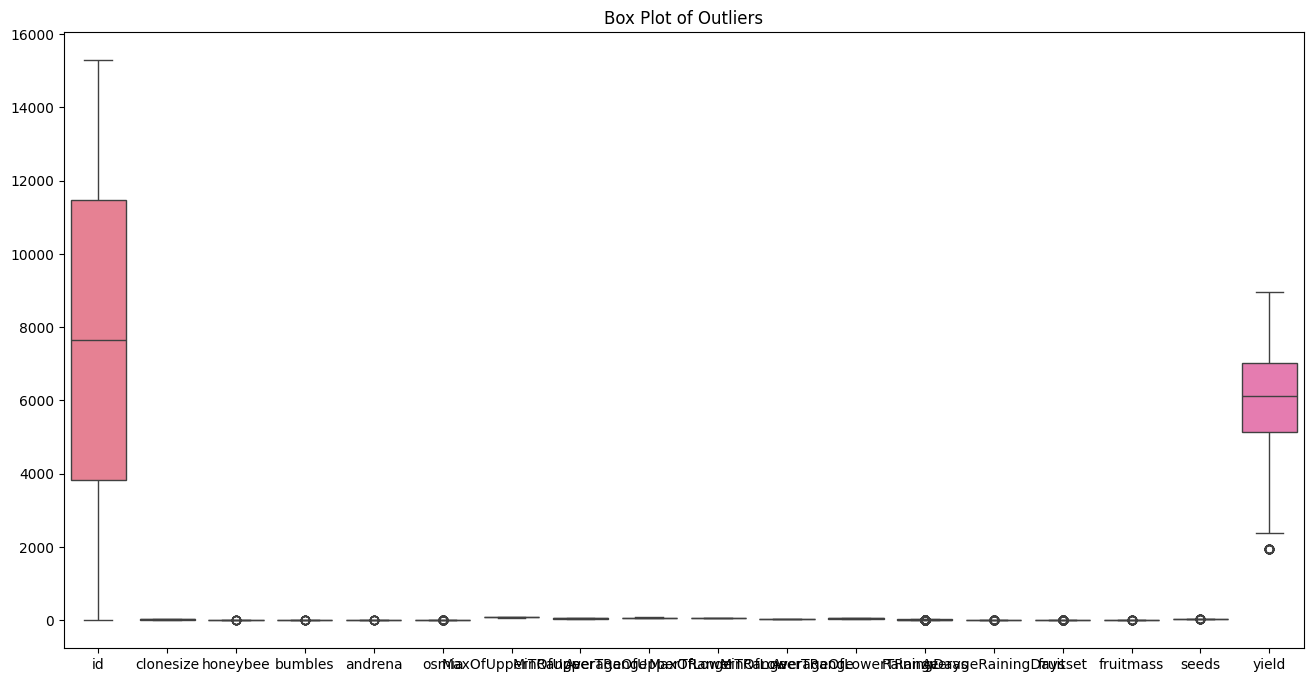

In [16]:
#Check for outliers in each column
for column in bf.columns:
    iqr_outliers = check_outliers_iqr(bf, column)
    zscore_outliers = check_outliers_zscore(bf, column)

    print(f"Outliers detected in {column} using IQR method:")
    print(iqr_outliers)

    print(f"Outliers detected in {column} using Z-score method:")
    print(zscore_outliers)

# Visualize outliers using box plots
plt.figure(figsize=(16, 8))
sns.boxplot(data=bf)
plt.title("Box Plot of Outliers")
plt.show()

#this data has no outliers d

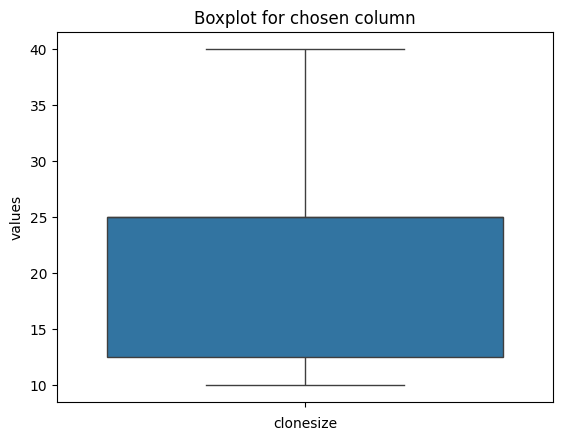

In [17]:
sns.boxplot(data=bf['clonesize'])
plt.title('Boxplot for chosen column')
plt.xlabel('clonesize')
plt.ylabel('values')
plt.show()

In [18]:
# Detect mismatches based on data types
for column in bf.columns:
    expected_type = bf[column].dtype
    if not isinstance(bf[column][0], expected_type.type):
        print(f"Mismatch detected in column '{column}': Expected type '{expected_type}' but found type '{type(bf[column][0])}'")
#

#there are no mismatched datatypes in the dataset

this data is clean beacause there ar no inconsestencies to handle ie missningness duplicates missmatches even outliers

DATA TRANSFORMATON
this wherere we perform:
Normalization
Stardadization
feature engineering
encoding


In [19]:
bf.head()

id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0       25.0      0.50     0.25     0.75   0.50              69.7   
1   1       25.0      0.50     0.25     0.50   0.50              69.7   
2   2       12.5      0.25     0.25     0.63   0.63              86.0   
3   3       12.5      0.25     0.25     0.63   0.50              77.4   
4   4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  41.2         24.0                0.39  0.425011   0.417545   
1                  41.2         24.0                0.39  0.444908   0.422051   
2                  50.8         24.0                0.39  0.552927   0.470853   
3                  45.8         24.0                0.39  0.565976   0.478137   
4                  45.8         24.0                0.39  0.579677   0.494165   

       seeds       yield  
0  32.460887  4476.81146  
1  33.858317  5548.12201  
2  38.341781  6869.77760  
3  39.467561  6880.77590  
4  40.484512  7479.93417

In [20]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [21]:
#normalization of the dataset

#def normalize(bf):
 #   return (bf - bf.min()) / (bf.max() - bf.min())

#normalized_bf = normalize(bf)

#print(normalized_bf)


#this makes more sense because the values of the dataset fit between the range of (0,1)

decided not to use normalization because the whole data frame is not on the same 

In [22]:
#checking for categorical columns

categorical_columns = bf.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)

#the data doesnt have any categorical columns

Index([], dtype='object')


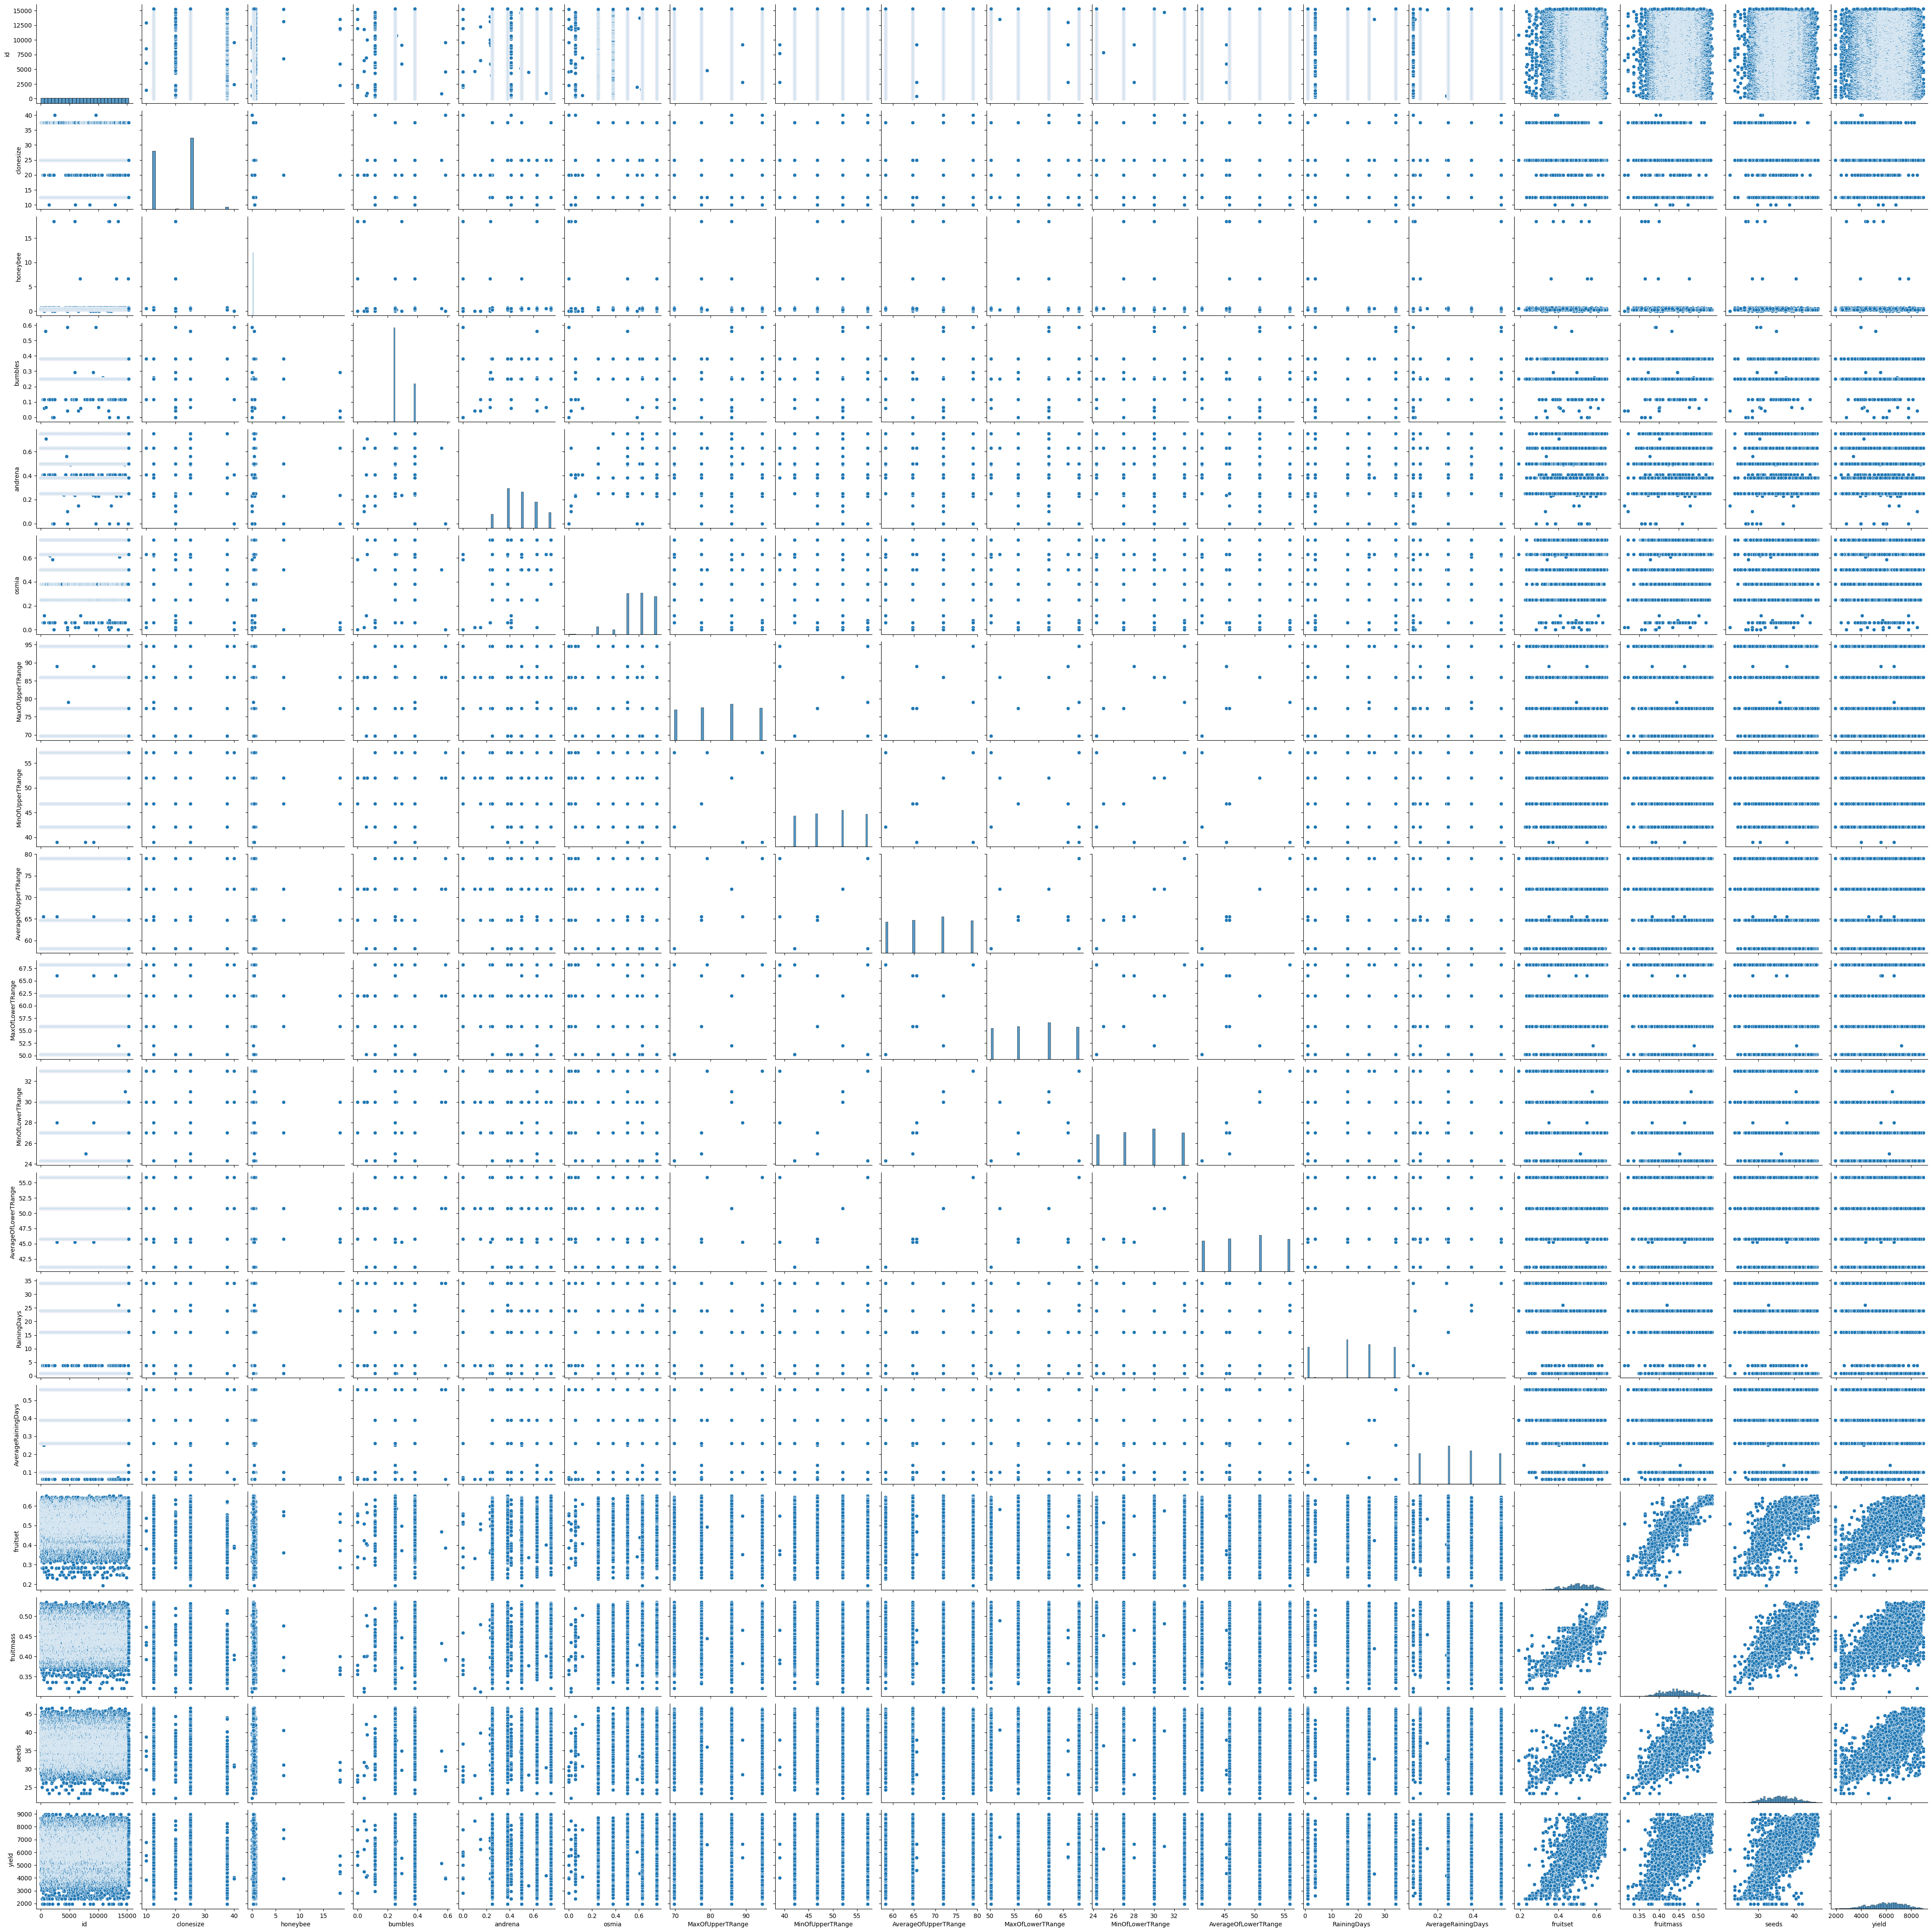

In [23]:
sns.pairplot(bf)

correlation matrix for the dataset

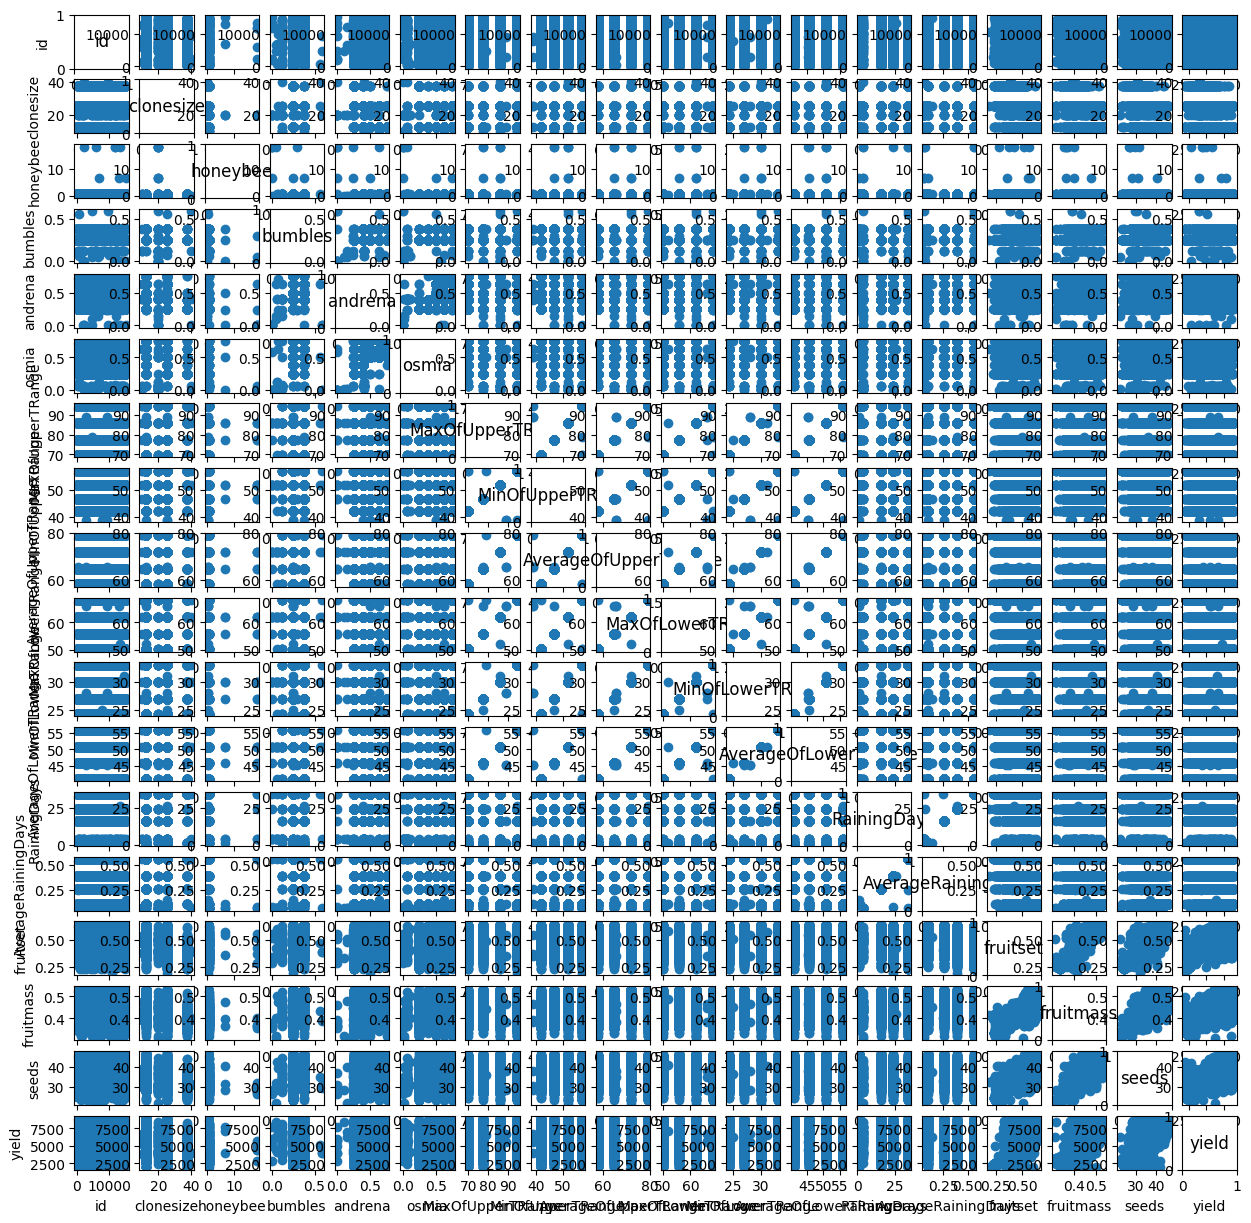

In [24]:
columns = bf.columns

# Create subplots
fig, axs = plt.subplots(len(columns), len(columns), figsize=(15, 15))

for i in range(len(columns)):
    for j in range(len(columns)):
        if i != j:
            axs[i, j].scatter(bf[columns[j]], bf[columns[i]])
        else:
            axs[i, j].text(0.5, 0.5, columns[i], horizontalalignment='center', verticalalignment='center', fontsize=12)
        if j == 0:
            axs[i, j].set_ylabel(columns[i])
        if i == len(columns) - 1:
            axs[i, j].set_xlabel(columns[j])

plt.show()


Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')


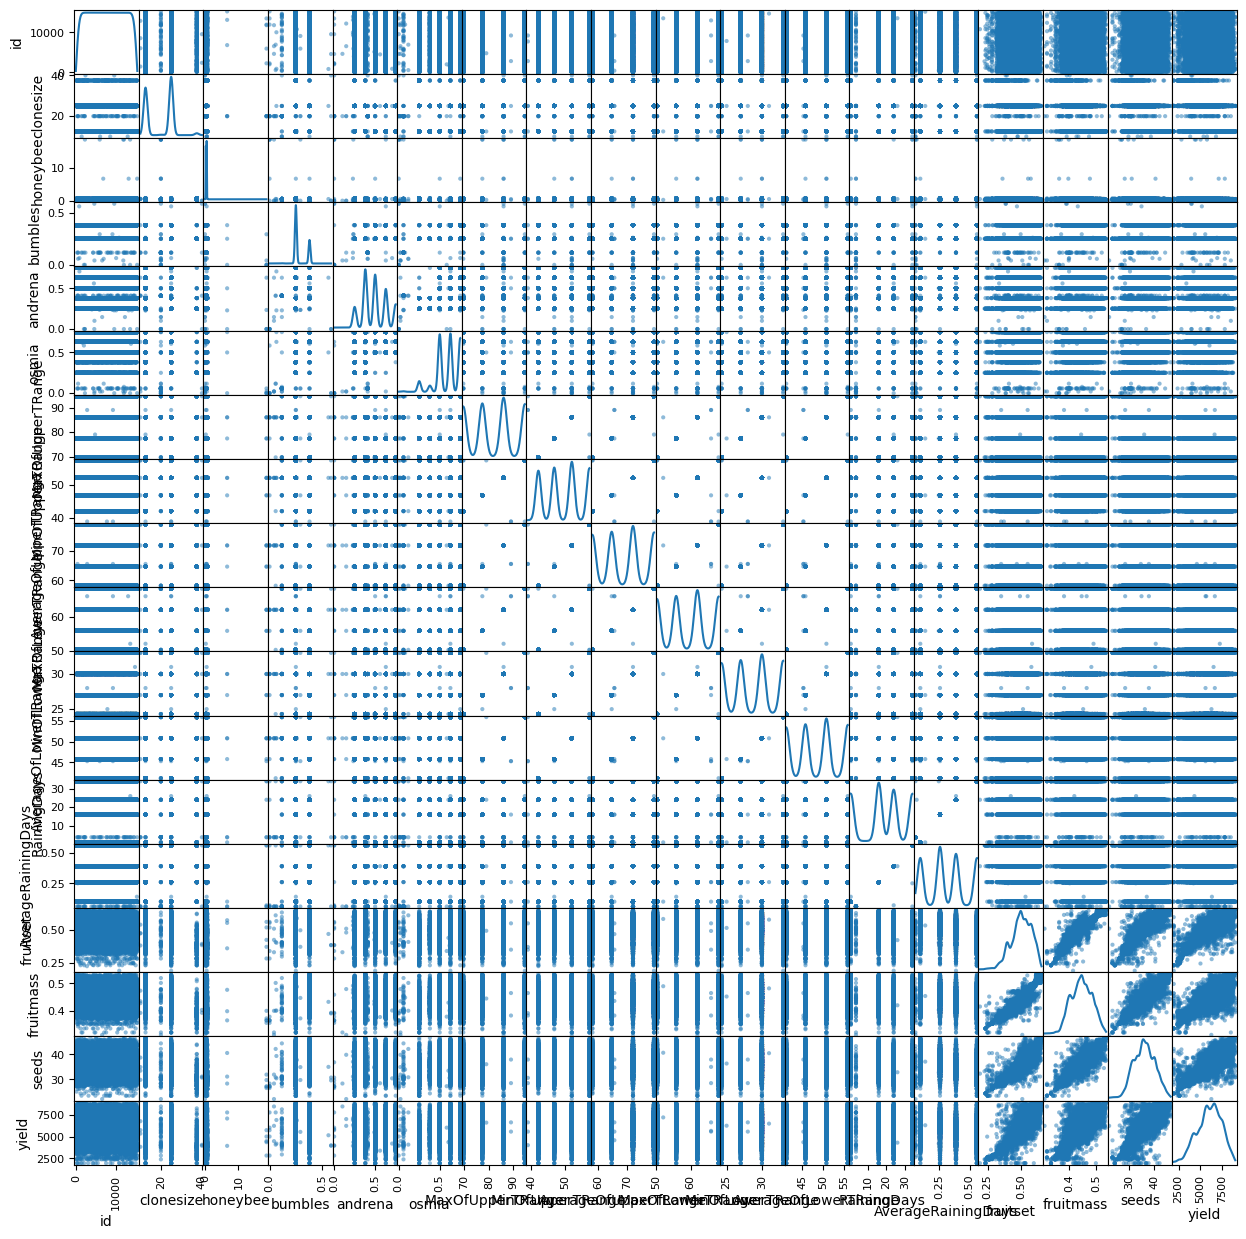

In [25]:
# Create scatter matrix
print(bf_cols)
scatter_matrix(bf, figsize=(15, 15), diagonal='kde')
plt.show()

In [26]:
bf.columns.tolist()


['id',
 'clonesize',
 'honeybee',
 'bumbles',
 'andrena',
 'osmia',
 'MaxOfUpperTRange',
 'MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'RainingDays',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds',
 'yield']

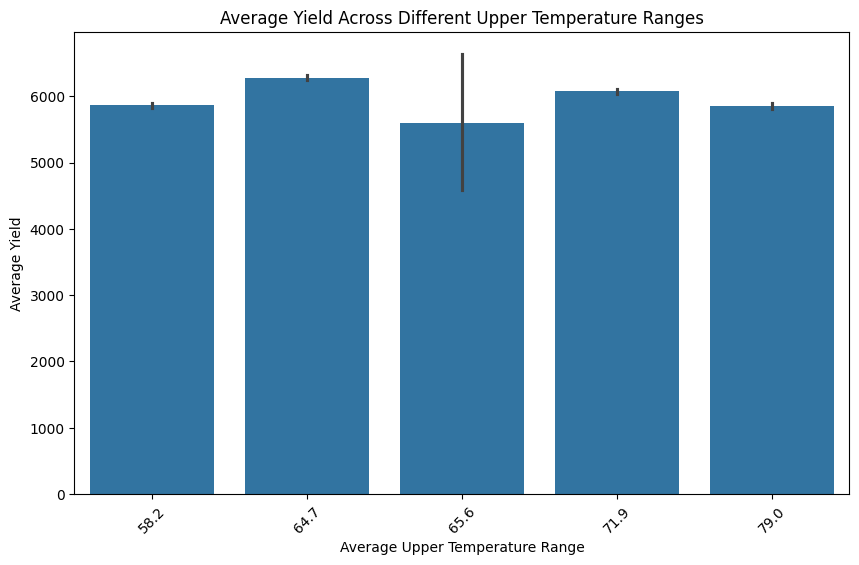

In [27]:
# Bar Chart: Comparing average yield across different ranges of AverageOfUpperTRange
plt.figure(figsize=(10, 6))
sns.barplot(x='AverageOfUpperTRange', y='yield', data=bf)
plt.title('Average Yield Across Different Upper Temperature Ranges')
plt.xlabel('Average Upper Temperature Range')
plt.ylabel('Average Yield')
plt.xticks(rotation=45)
plt.show()

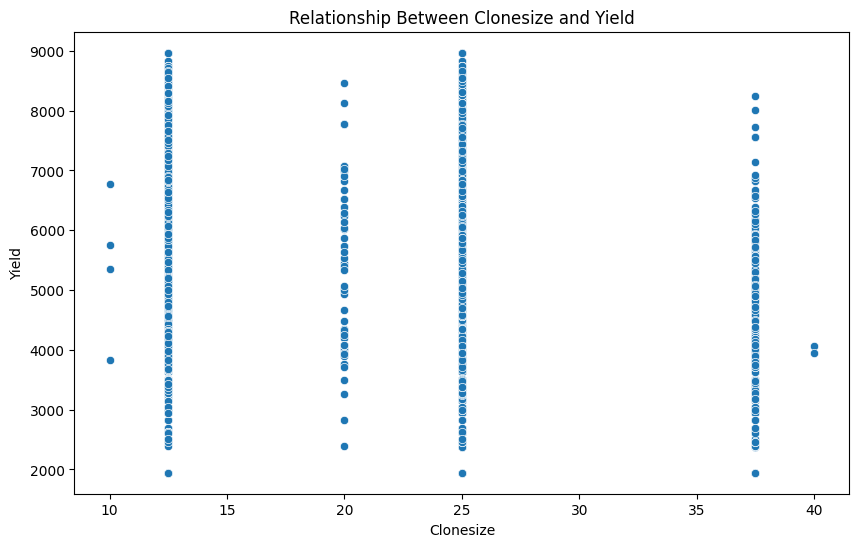

In [28]:
# Scatter Plot: Relationship between yield and clonesize
plt.figure(figsize=(10, 6))
sns.scatterplot(x='clonesize', y='yield', data=bf)
plt.title('Relationship Between Clonesize and Yield')
plt.xlabel('Clonesize')
plt.ylabel('Yield')
plt.show()

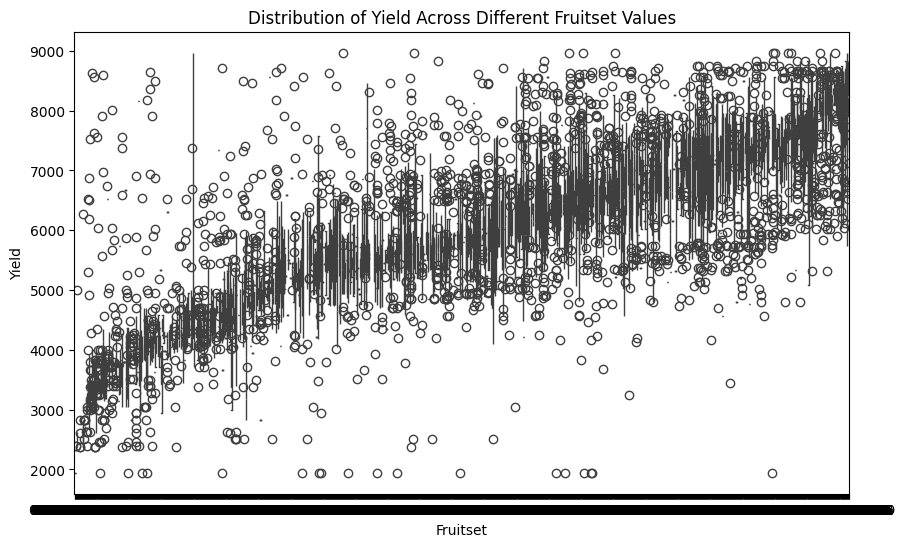

In [29]:
# Box Plot: Distribution of yield for different categories of fruitset
plt.figure(figsize=(10, 6))
sns.boxplot(x='fruitset', y='yield', data=bf)
plt.title('Distribution of Yield Across Different Fruitset Values')
plt.xlabel('Fruitset')
plt.ylabel('Yield')
plt.show()


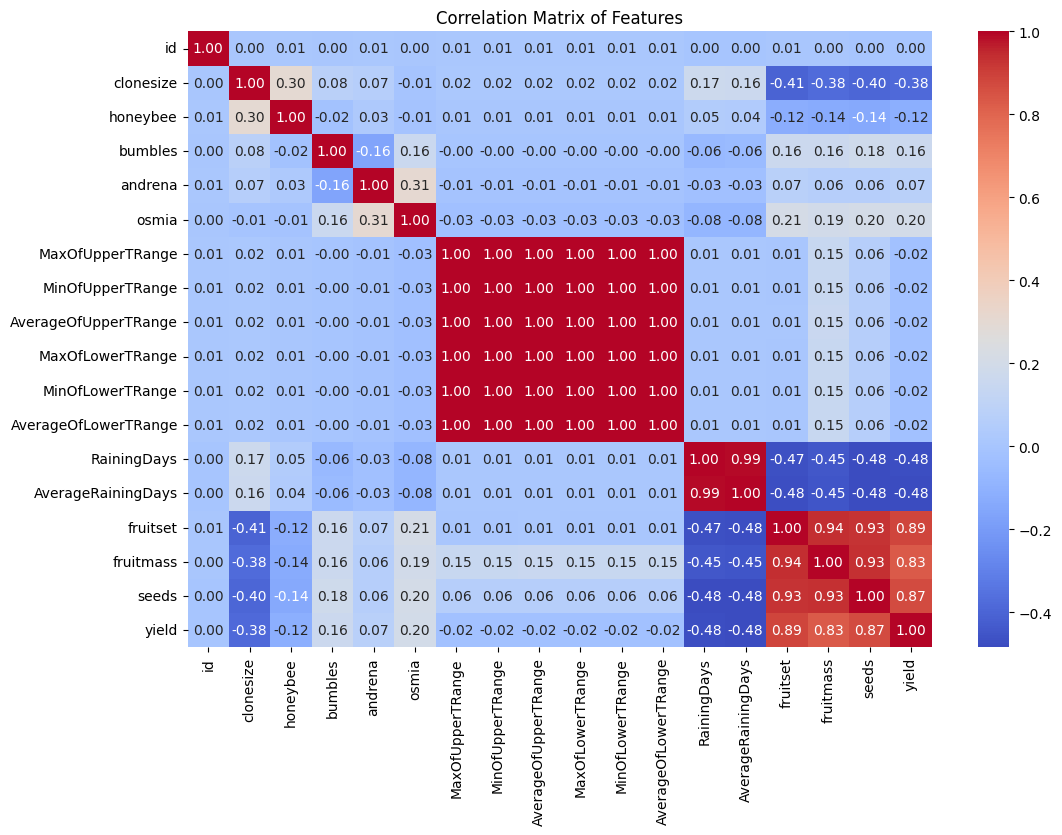

In [30]:
#Heatmap: Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = bf.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

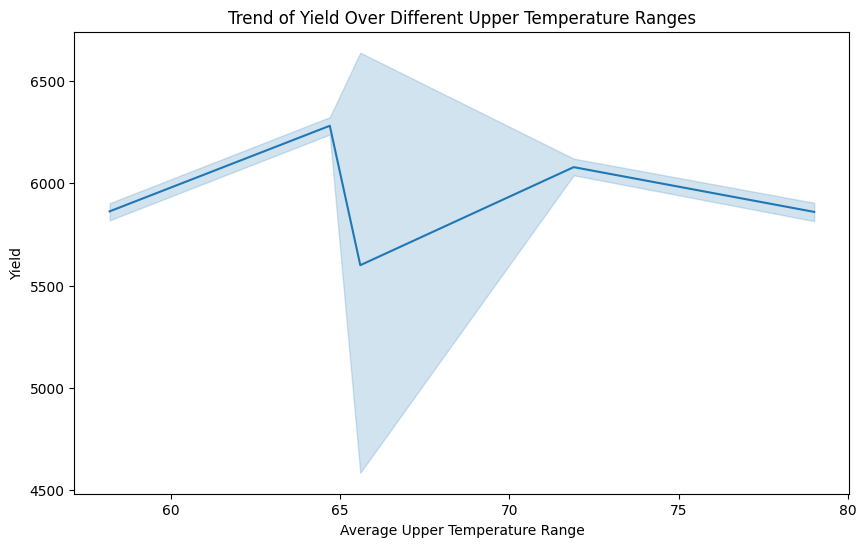

In [31]:
 #Line Plot: Trend of yield over different AverageOfUpperTRange
plt.figure(figsize=(10, 6))
sns.lineplot(x='AverageOfUpperTRange', y='yield', data=bf)
plt.title('Trend of Yield Over Different Upper Temperature Ranges')
plt.xlabel('Average Upper Temperature Range')
plt.ylabel('Yield')
plt.show()

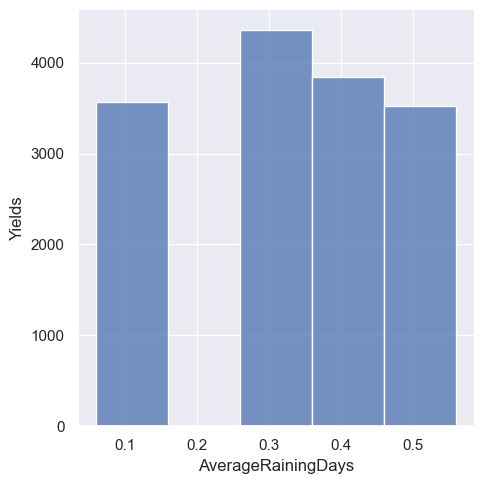

In [32]:
AverageRainingDays = bf['AverageRainingDays']

sns.set_theme(style="darkgrid")

sns.displot(data=bf, x="AverageRainingDays", bins=5)
plt.ylabel('Yields')

plt.show()


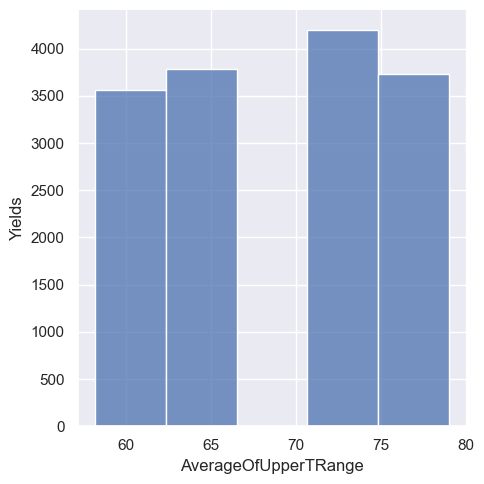

In [33]:
andrena = bf['AverageOfUpperTRange']

sns.set_theme(style="darkgrid")

sns.displot(data=bf, x="AverageOfUpperTRange", bins=5)
plt.ylabel('Yields')

plt.show()


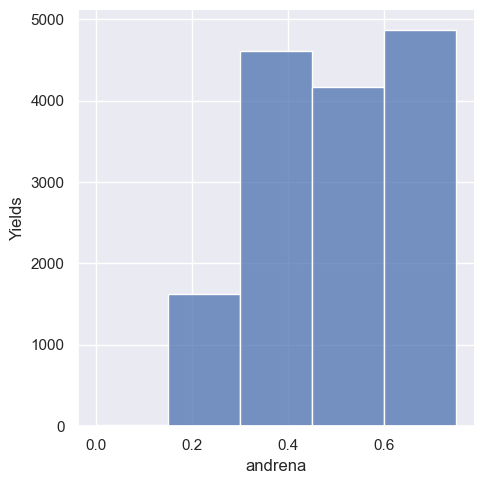

In [34]:
andrena = bf['andrena']

sns.set_theme(style="darkgrid")

sns.displot(data=bf, x="andrena", bins=5)
plt.ylabel('Yields')

plt.show()


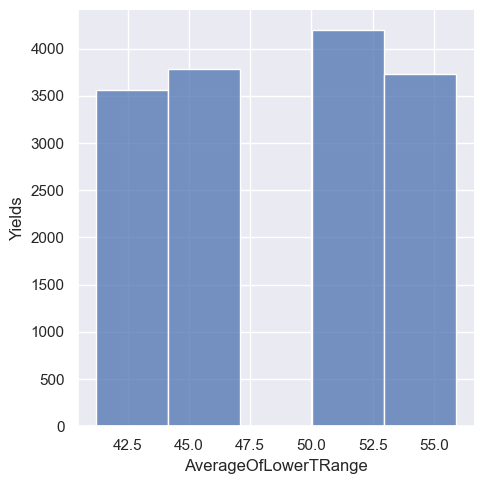

In [35]:
AverageOfLowerTRange = bf['AverageOfLowerTRange']

sns.set_theme(style="darkgrid")

sns.displot(data=bf, x="AverageOfLowerTRange", bins=5)
plt.ylabel('Yields')
plt.show()


In [36]:
bf.head()

id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0       25.0      0.50     0.25     0.75   0.50              69.7   
1   1       25.0      0.50     0.25     0.50   0.50              69.7   
2   2       12.5      0.25     0.25     0.63   0.63              86.0   
3   3       12.5      0.25     0.25     0.63   0.50              77.4   
4   4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  41.2         24.0                0.39  0.425011   0.417545   
1                  41.2         24.0                0.39  0.444908   0.422051   
2                  50.8         24.0                0.39  0.552927   0.470853   
3                  45.8         24.0                0.39  0.565976   0.478137   
4                  45.8         24.0                0.39  0.579677   0.494165   

       seeds       yield  
0  32.460887  4476.81146  
1  33.858317  5548.12201  
2  38.341781  6869.77760  
3  39.467561  6880.77590  
4  40.484512  7479.93417

In [37]:
#labeling

x =bf.drop(columns=['yield','id'], axis=1)
y = bf['yield']

print(x.shape, y.shape)


(15289, 16) (15289,)


In [38]:
#split test
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size=0.1, random_state=42)


LINEAR REGRESSION

In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred =model.predict(X_test)


In [42]:
y_pred

array([7000.12973357, 6394.56114263, 4355.16866798, ..., 4669.79458123,
       7036.29940447, 6374.53973694])

In [43]:
y_test

3519     8711.20896
6096     5914.16491
895      4234.86859
11345    5504.75083
7219     3276.36206
            ...    
4739     4357.82292
9697     7617.39589
10315    4580.39300
15037    6292.42962
8663     6615.69006
Name: yield, Length: 1529, dtype: float64

A larger MSE indicates that the data points are dispersed widely around its central moment (mean), whereas a smaller MSE suggests the opposite. A smaller MSE is preferred because it indicates that your data points are dispersed closely around its central moment (mean).

In [44]:
#evaluating the model
#using MSE

mse = mean_squared_error(y_test,y_pred)

print(f'mean_squared_error: {mse}')

mean_squared_error: 317324.92180846265


The most common interpretation of r-squared is how well the regression model explains observed data. For example, an r-squared of 60% reveals that 60% of the variability observed in the target variable is explained by the regression model. Generally, a higher r-squared indicates more variability is explained by the model.

In [45]:
#using R-Squared

r2 =r2_score(y_test, y_pred)*100

print(f'R-squared: {r2}')

R-squared: 81.99180362287629


In [46]:
print(X_test.shape)
print(y_pred.shape)


(1529, 16)
(1529,)


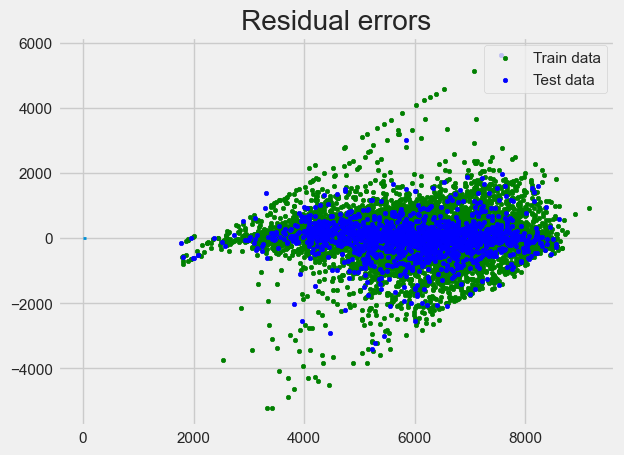

In [47]:
# plot for residual error
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()


plt.style.use('fivethirtyeight'):
applies the "fivethirtyeight" style to your Matplotlib plots, which gives them a look similar to the graphics used by FiveThirtyEight. This style has a clean, minimalistic design with gridlines and some subtle background features.

In [48]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))


# the variance score for this model is ok because its close to 1

Coefficients:  [-4.89219817e+00 -2.46911428e+00  3.35627601e+02  1.24977249e+02
  3.94306359e+01  5.78298880e+01  2.33500224e+01 -3.11728656e+02
  2.27536099e+01  9.18473102e+02 -2.58171465e+02 -8.94523145e-01
 -4.46104609e+02  1.17171956e+04 -7.14672098e+03  1.34624841e+02]
Variance score: 0.8199180362287629


Dimensionality reduction 
- Is a method for representing a given dataset using a lower number of features (i.e. dimensions) while still capturing the original data's meaningful properties.

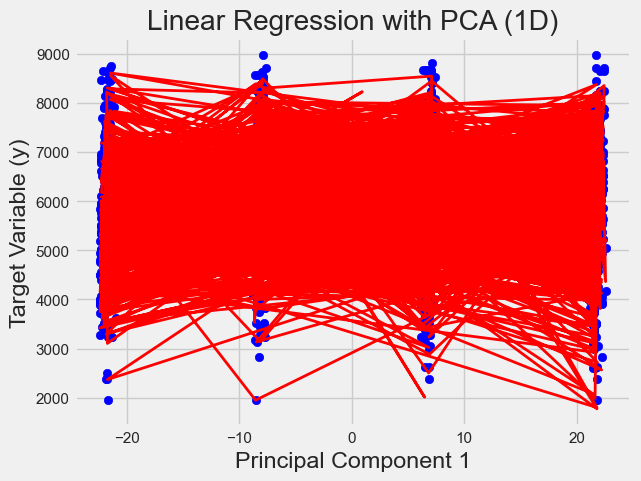

In [49]:
pca = PCA(n_components=1)

X_test_pca = pca.fit_transform(X_test)

plt.scatter(X_test_pca, y_test, color='blue')  
plt.plot(X_test_pca, y_pred, color='red', linewidth=2)  # Regression line
plt.title("Linear Regression with PCA (1D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Target Variable (y)")
plt.show()

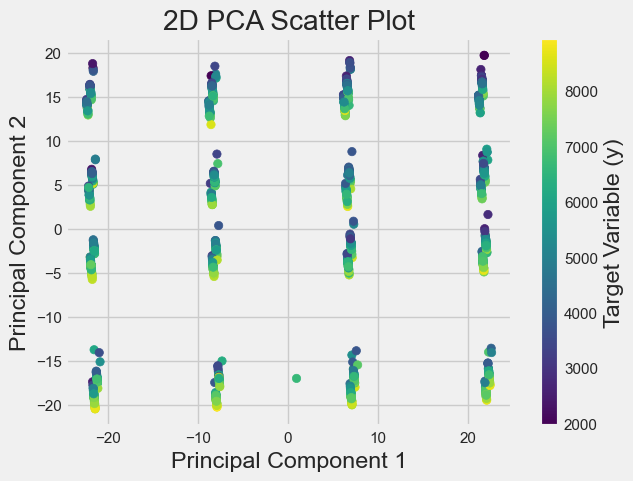

In [50]:
pca = PCA(n_components=2)

X_test_pca = pca.fit_transform(X_test)

if pca.n_components == 2:
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("2D PCA Scatter Plot")
    plt.colorbar(label="Target Variable (y)")
    plt.show()

###c=y_test: Colors the points in the scatter plot based on the values of y_test. This allows you to visualize how the target variable (such as class labels) is distributed across the scatter plot.

'viridis' is a perceptually uniform colormap that ranges from yellow to purple. You can choose other colormaps depending on your preference or needs.

# Cross Validation

# Grid Search Cross Validation
best cross validation model to use for this dataset


In [51]:
# Define the parameters
param_grid = {
    'fit_intercept': [True, False]
}


In [52]:
model = LinearRegression()

In [53]:
# Perform a grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='r2')

In [54]:
# Give me the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'fit_intercept': True}


In [55]:
# With the best parameter what is the best r2score
print(f"Best R-Square: {grid_search.best_score_}")

Best R-Square: 0.8065620857941956


In [56]:
# Use the best model to predict and evalute
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test Set R-Squared: {r2_score(y_test, y_pred)}")

Test Set R-Squared: 0.8199180362287629


# Random search validation

In [57]:
# define the parameter distribution
param_dist = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

In [58]:
model = LinearRegression()

In [59]:
# Perfomr the randomized search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv = 5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

c:\Users\mkiarie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False]},
                   random_state=42, scoring='r2')

In [60]:
# Output the best parameters
print(f"Best Parameters: {random_search.best_params_}")

Best Parameters: {'fit_intercept': True, 'copy_X': True}


In [61]:
print(f"Best R-Squared: {random_search.best_score_}")

Best R-Squared: 0.8065620857941956


In [62]:
# Use the best model to predict and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f'Test Set R-Squared: {r2_score(y_test,y_pred)}')

Test Set R-Squared: 0.8199180362287629


# Polynomial Linear Regression


In [63]:
lin_reg=LinearRegression()
lin_reg.fit(x,y)


LinearRegression()

In [64]:
poly_reg2=PolynomialFeatures(degree=2)
X_poly=poly_reg2.fit_transform(x)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(x)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y)


LinearRegression()

ValueError: x and y must be the same size

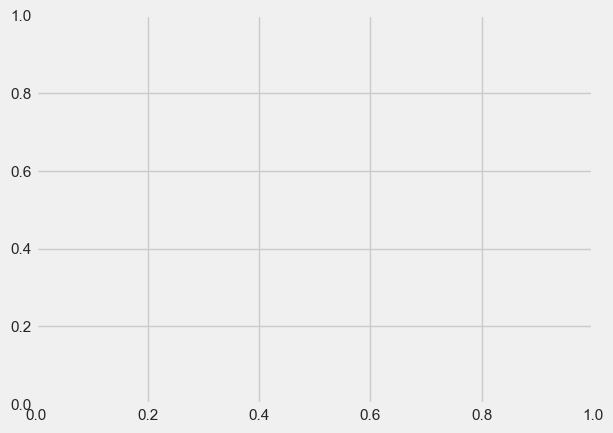

In [65]:
plt.style.use('fivethirtyeight')
plt.scatter(x,y,color='red')

#plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('Polynomial Linear Regression Degree 3')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# lasso  and ridge regression 


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)


c:\Users\mkiarie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.105e+09, tolerance: 2.463e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\mkiarie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [222]:
#lasso evaluation
lasso_rmse = np.sqrt(mean_absolute_error(y_test, y_pred_lasso))
print(lasso_rmse)

lasso_r2 = r2_score(y_test,y_pred_lasso)
print(lasso_r2)

88.03984771637583
-47.02994037106437


In [216]:
#Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)


In [220]:
# Evaluate ridge model
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(ridge_rmse)

ridge_r2 = r2_score(y_test, y_pred_ridge)
print(ridge_r2)

562.9670406119619
0.820141082539831


In [217]:
# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)


In [221]:
# Evaluate models
poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(poly_rmse)

poly_r2 = r2_score(y_test, y_pred_poly)
print(poly_r2)


4346340.7214481635
-10720462.781541593


Analysis:
Ridge regression performed with a reasonable fit as indicated by the R² values
The Polynomial Regression (degree 2) resulted in a very high RMSE and a negative R² value, indicating that the model is not suitable or overfits the data severely.

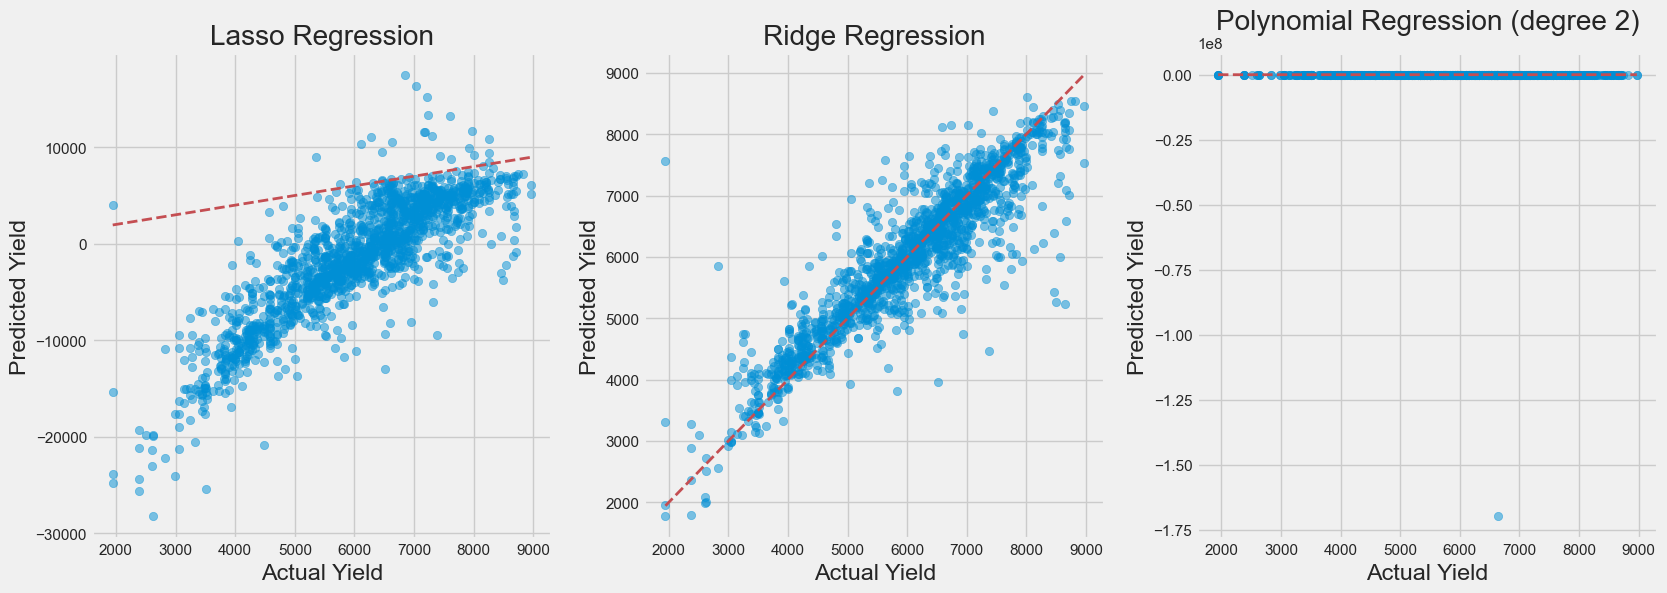

In [224]:
# plotting the lasso regression 
# Plotting predictions vs actual values for Lasso, Ridge, and Polynomial Regression

plt.figure(figsize=(18, 6))

# Lasso Regression Plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Lasso Regression')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# Ridge Regression Plot
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Ridge Regression')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# Polynomial Regression Plot
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Polynomial Regression (degree 2)')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

plt.show()


#Lasso Regression: The predictions are not closely aligned with the actual values, hence no linear relaition

#Ridge Regression: the predictions are well-aligned with the actual values.

#Polynomial Regression (degree 2): The predictions are highly dispersed, indicating poor performance and possibly overfitting.